Using `ECOv002-CMR` package to retrieve ECOSTRESS granules as inputs using the Common Metadata Repository (CMR) API. Using `ECOv002-L2T-STARS` package to run the product generating executable (PGE).

In [1]:
import numpy as np
from ECOv002_CMR import download_ECOSTRESS_granule
from ECOv003_L2T_STARS import generate_L2T_STARS_runconfig, L2T_STARS

[2025-05-19 13:42:14 INFO] HLS 2.0 working directory: /Users/maggiej/Documents/GitHub/ECOv003-L2T-STARS
[2025-05-19 13:42:14 INFO] HLS 2.0 download directory: /Users/maggiej/Documents/GitHub/ECOv003-L2T-STARS/HLS2_download
[2025-05-19 13:42:14 INFO] HLS 2.0 products directory: /Users/maggiej/Documents/GitHub/ECOv003-L2T-STARS/HLS2_products
[2025-05-19 13:42:15 INFO] You're now authenticated with NASA Earthdata Login


Disable logger output in notebook

In [2]:
import logging

logging.getLogger().handlers = []

Set working directory

In [3]:
working_directory = "~/data/ECOSTRESS_demo_C2"

Retrieve LST LSTE granule from CMR API for target date

In [4]:
L2T_LSTE_granule = download_ECOSTRESS_granule(
    product="L2T_LSTE", 
    orbit=35800,
    scene=3,
    tile="11SPS", 
    aquisition_date="2024-10-29",
    parent_directory=working_directory
)

L2T_LSTE_granule

L2TLSTE("/Users/maggiej/data/ECOSTRESS_demo_C2/ECOv002_L2T_LSTE_35800_003_11SPS_20241029T075947_0713_01")

Load and display preview of surface temperature

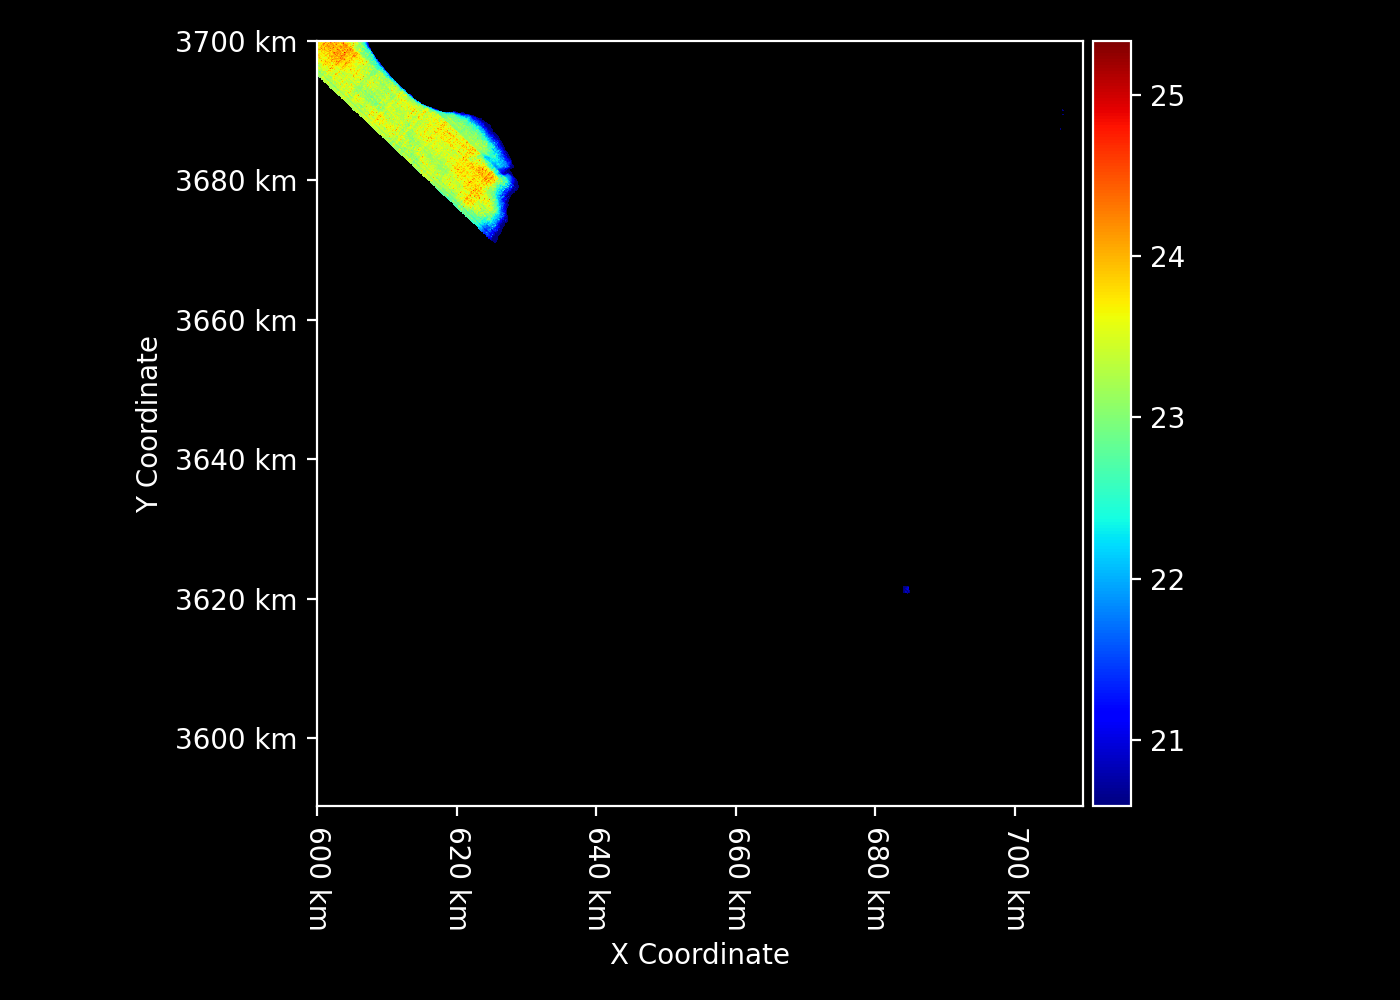

In [5]:
L2T_LSTE_granule.ST_C

Retrieve L2T STARS granule from CMR API as prior

In [6]:
L2T_STARS_granule = download_ECOSTRESS_granule(
    product="L2T_STARS", 
    tile="11SPS", 
    aquisition_date="2024-10-22",
    parent_directory=working_directory
)

L2T_STARS_granule

L2TSTARS("/Users/maggiej/data/ECOSTRESS_demo_C2/ECOv002_L2T_STARS_11SPS_20241022_0713_01")

Load and display preview of vegetation index

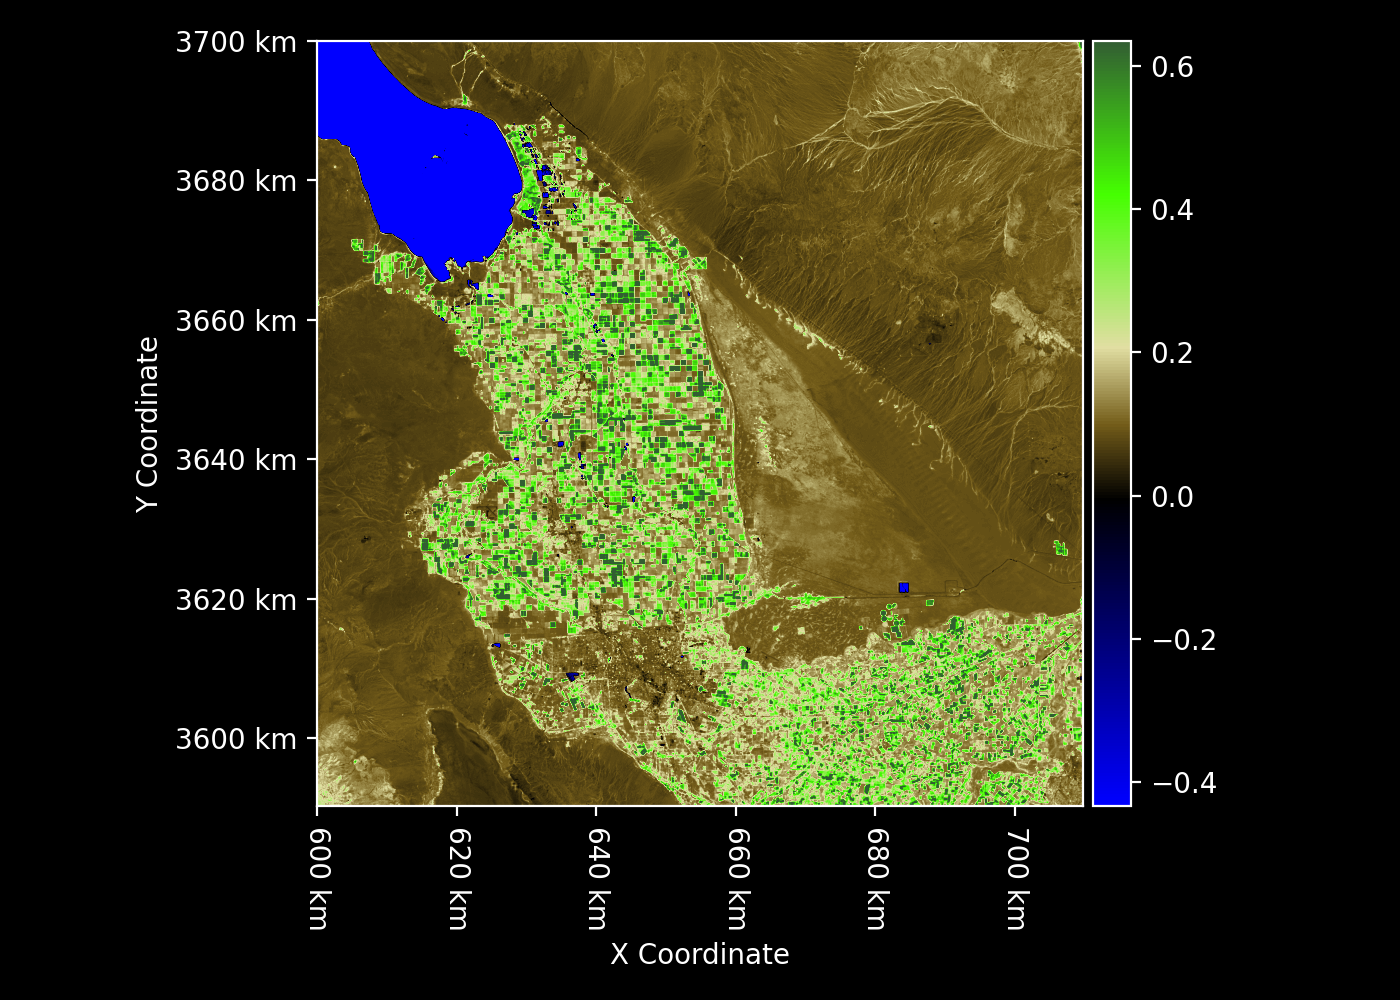

In [7]:
L2T_STARS_granule.NDVI

Generate XML run-config file for L2T STARS PGE run

In [8]:
runconfig_filename = generate_L2T_STARS_runconfig(
    L2T_LSTE_filename=L2T_LSTE_granule.product_filename,
    prior_L2T_STARS_filename=L2T_STARS_granule.product_filename,
    working_directory=working_directory
)

runconfig_filename

'/Users/maggiej/data/ECOSTRESS_demo_C2/runconfig/ECOv003_L2T_STARS_11SPS_20241029_0700_01.xml'

In [9]:
with open(runconfig_filename, "r") as f:
    print(f.read())

<?xml version="1.0" encoding="UTF-8"?>
<input xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
       xmlns:xalan="http://xml.apache.org/xslt"
       xmlns:cas="http://oodt.jpl.nasa.gov/1.0/cas"
       xsi:noNamespaceSchemaLocation="">
    <group name="LogMetadata">
        <vector name="CommandLineParameters">
            <element>L2T_STARS</element>
            <element>/Users/maggiej/data/ECOSTRESS_demo_C2/runconfig/ECOv003_L2T_STARS_11SPS_20241029_0700_01.xml</element>
            <element>/Users/maggiej/data/ECOSTRESS_demo_C2/log/ECOv003_L2T_STARS_11SPS_20241029_0700_01.log</element>
        </vector>
    </group>
    <group name="JobIdentification">
        <scalar name="ProductionLocation">ECOSTRESS Science Computing Facility</scalar>
        <scalar name="TaskId">urn:ecostress:L2GL2TLSTETask</scalar>
        <scalar name="ProcessingNode">MT-506659</scalar>
        <scalar name="ProductionDateTime">20241029</scalar>
        <scalar name="JobId">20241029</scalar>
        <sc

In [ ]:
exit_code = L2T_STARS(runconfig_filename=runconfig_filename, use_VNP43NRT=False, threads=1, num_workers=8)
exit_code

[2025-05-19 13:42:27 INFO] L2T_STARS PGE (1.0.1)
[2025-05-19 13:42:27 INFO] L2T_STARS run-config: /Users/maggiej/data/ECOSTRESS_demo_C2/runconfig/ECOv003_L2T_STARS_11SPS_20241029_0700_01.xml
[2025-05-19 13:42:27 INFO] granule ID: ECOv002_L2T_STARS_11SPS_20241029_0700_01
[2025-05-19 13:42:27 INFO] granule directory: /Users/maggiej/data/ECOSTRESS_demo_C2/L2T_STARS_output/ECOv002_L2T_STARS_11SPS_20241029_0700_01
[2025-05-19 13:42:27 INFO] zip filename: /Users/maggiej/data/ECOSTRESS_demo_C2/L2T_STARS_output/ECOv002_L2T_STARS_11SPS_20241029_0700_01.zip
[2025-05-19 13:42:27 INFO] browse filename: /Users/maggiej/data/ECOSTRESS_demo_C2/L2T_STARS_output/ECOv002_L2T_STARS_11SPS_20241029_0700_01.png
[2025-05-19 13:42:27 INFO] working_directory: /Users/maggiej/data/ECOSTRESS_demo_C2
[2025-05-19 13:42:27 INFO] log: /Users/maggiej/data/ECOSTRESS_demo_C2/log/ECOv002_L2T_STARS_11SPS_20241029_0700_01.log
[2025-05-19 13:42:27 INFO] source directory: /Users/maggiej/data/ECOSTRESS_demo_C2/L2T_STARS_SOURCE

QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-05-19 13:42:37 INFO] File HLS.S30.T11SPS.2024297T181329.v2.0.B01.tif already downloaded
[2025-05-19 13:42:37 INFO] File HLS.S30.T11SPS.2024297T181329.v2.0.SZA.tif already downloaded
[2025-05-19 13:42:37 INFO] File HLS.S30.T11SPS.2024297T181329.v2.0.B02.tif already downloaded
[2025-05-19 13:42:37 INFO] File HLS.S30.T11SPS.2024297T181329.v2.0.B08.tif already downloaded
[2025-05-19 13:42:37 INFO] File HLS.S30.T11SPS.2024297T181329.v2.0.B10.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-05-19 13:42:37 INFO] File HLS.S30.T11SPS.2024297T181329.v2.0.B8A.tif already downloaded
[2025-05-19 13:42:37 INFO] File HLS.S30.T11SPS.2024297T181329.v2.0.B07.tif already downloaded
[2025-05-19 13:42:37 INFO] File HLS.S30.T11SPS.2024297T181329.v2.0.B03.tif already downloaded
[2025-05-19 13:42:37 INFO] File HLS.S30.T11SPS.2024297T181329.v2.0.B06.tif already downloaded
[2025-05-19 13:42:37 INFO] File HLS.S30.T11SPS.2024297T181329.v2.0.B04.tif already downloaded
[2025-05-19 13:42:37 INFO] File HLS.S30.T11SPS.2024297T181329.v2.0.Fmask.tif already downloaded
[2025-05-19 13:42:37 INFO] File HLS.S30.T11SPS.2024297T181329.v2.0.VZA.tif already downloaded
[2025-05-19 13:42:37 INFO] File HLS.S30.T11SPS.2024297T181329.v2.0.VAA.tif already downloaded
[2025-05-19 13:42:37 INFO] File HLS.S30.T11SPS.2024297T181329.v2.0.B09.tif already downloaded
[2025-05-19 13:42:37 INFO] File HLS.S30.T11SPS.2024297T181329.v2.0.B05.tif already downloaded
[2025-05-19 13:42:37 INFO] File HLS.S30.T11SPS.2024297T181

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-05-19 13:42:37 INFO] searching for Landsat tile 11SPS on 2024-10-23
[2025-05-19 13:42:37 WARNING] CPLE_AppDefined in PROJ: internal_proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2025-05-19 13:42:37 WARNING] CPLE_AppDefined in The definition of projected CRS EPSG:32611 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
[2025-05-19 13:42:37 WARNING] CPLE_AppDefined in PROJ: internal_proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installat

QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-05-19 13:42:51 INFO] File HLS.S30.T11SPS.2024302T181451.v2.0.VAA.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.S30.T11SPS.2024302T181451.v2.0.B8A.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.S30.T11SPS.2024302T181451.v2.0.B02.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.S30.T11SPS.2024302T181451.v2.0.B12.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.S30.T11SPS.2024302T181451.v2.0.B09.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-05-19 13:42:51 INFO] File HLS.S30.T11SPS.2024302T181451.v2.0.SAA.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.S30.T11SPS.2024302T181451.v2.0.SZA.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.S30.T11SPS.2024302T181451.v2.0.B04.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.S30.T11SPS.2024302T181451.v2.0.B08.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.S30.T11SPS.2024302T181451.v2.0.B10.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.S30.T11SPS.2024302T181451.v2.0.B05.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.S30.T11SPS.2024302T181451.v2.0.B03.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.S30.T11SPS.2024302T181451.v2.0.B07.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.S30.T11SPS.2024302T181451.v2.0.B01.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.S30.T11SPS.2024302T181451.v2.0.B06.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.S30.T11SPS.2024302T18145

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-05-19 13:42:51 INFO] searching for Landsat tile 11SPS on 2024-10-28
[2025-05-19 13:42:51 INFO] retrieving Landsat tile 11SPS on 2024-10-28: /Users/maggiej/data/ECOSTRESS_demo_C2/L2T_STARS_SOURCES/HLS2_download/2024.10.28/HLS.L30.T11SPS.2024302T181631.v2.0
[2025-05-19 13:42:51 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-05-19 13:42:51 INFO] File HLS.L30.T11SPS.2024302T181631.v2.0.B03.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.L30.T11SPS.2024302T181631.v2.0.B02.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.L30.T11SPS.2024302T181631.v2.0.B10.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-05-19 13:42:51 INFO] File HLS.L30.T11SPS.2024302T181631.v2.0.SZA.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.L30.T11SPS.2024302T181631.v2.0.B07.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.L30.T11SPS.2024302T181631.v2.0.VAA.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.L30.T11SPS.2024302T181631.v2.0.SAA.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.L30.T11SPS.2024302T181631.v2.0.Fmask.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.L30.T11SPS.2024302T181631.v2.0.B11.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.L30.T11SPS.2024302T181631.v2.0.B06.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.L30.T11SPS.2024302T181631.v2.0.B04.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.L30.T11SPS.2024302T181631.v2.0.B05.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.L30.T11SPS.2024302T181631.v2.0.B01.tif already downloaded
[2025-05-19 13:42:51 INFO] File HLS.L30.T11SPS.2024302T181

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-05-19 13:42:52 WARNING] CPLE_AppDefined in PROJ: internal_proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2025-05-19 13:42:52 WARNING] CPLE_AppDefined in The definition of projected CRS EPSG:32611 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
[2025-05-19 13:42:52 WARNING] CPLE_AppDefined in PROJ: internal_proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2025-05-19 13:42:52 WARNING] CPLE_AppDefined in The definition of pr

/Users/Maggiej/opt/anaconda3/envs/ECOv003-L2T-STARS/lib/python3.11/site-packages/harmonized_landsat_sentinel/HLS2_CMR_connection.py:199: RuntimeWarning: Mean of empty slice
  NDVI = rt.Raster(np.nanmean(np.dstack([sentinel.NDVI, landsat.NDVI]), axis=2), geometry=sentinel.geometry)


[2025-05-19 13:42:54 WARNING] CPLE_AppDefined in PROJ: internal_proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2025-05-19 13:42:54 WARNING] CPLE_AppDefined in The definition of projected CRS EPSG:32611 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
[2025-05-19 13:42:54 INFO] preparing coarse image for STARS albedo at 11SPS on 2024-10-28
[2025-05-19 13:42:54 INFO] scanning LP-DAAC: https://e4ftl01.cr.usgs.gov/VIIRS/VNP43MA3.001/2024.10.28
[2025-05-19 13:42:55 INFO] file already retrieved: /Users/maggiej/data/ECOSTRESS_demo_C2/L2T_STARS_SOURCES/VIIRS_download/VNP43MA3/202

QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-05-19 13:42:57 INFO] File HLS.L30.T11SPS.2024303T181009.v2.0.Fmask.tif already downloaded
[2025-05-19 13:42:57 INFO] File HLS.L30.T11SPS.2024303T181009.v2.0.B02.tif already downloaded
[2025-05-19 13:42:57 INFO] File HLS.L30.T11SPS.2024303T181009.v2.0.SZA.tif already downloaded
[2025-05-19 13:42:57 INFO] File HLS.L30.T11SPS.2024303T181009.v2.0.B01.tif already downloaded
[2025-05-19 13:42:57 INFO] File HLS.L30.T11SPS.2024303T181009.v2.0.B11.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-05-19 13:42:57 INFO] File HLS.L30.T11SPS.2024303T181009.v2.0.B05.tif already downloaded
[2025-05-19 13:42:57 INFO] File HLS.L30.T11SPS.2024303T181009.v2.0.VZA.tif already downloaded
[2025-05-19 13:42:57 INFO] File HLS.L30.T11SPS.2024303T181009.v2.0.VAA.tif already downloaded
[2025-05-19 13:42:57 INFO] File HLS.L30.T11SPS.2024303T181009.v2.0.B06.tif already downloaded
[2025-05-19 13:42:57 INFO] File HLS.L30.T11SPS.2024303T181009.v2.0.B10.tif already downloaded
[2025-05-19 13:42:57 INFO] File HLS.L30.T11SPS.2024303T181009.v2.0.B03.tif already downloaded
[2025-05-19 13:42:57 INFO] File HLS.L30.T11SPS.2024303T181009.v2.0.B04.tif already downloaded
[2025-05-19 13:42:57 INFO] File HLS.L30.T11SPS.2024303T181009.v2.0.SAA.tif already downloaded
[2025-05-19 13:42:57 INFO] File HLS.L30.T11SPS.2024303T181009.v2.0.B07.tif already downloaded
[2025-05-19 13:42:57 INFO] File HLS.L30.T11SPS.2024303T181009.v2.0.B09.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-05-19 13:42:57 WARNING] CPLE_AppDefined in PROJ: internal_proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2025-05-19 13:42:57 WARNING] CPLE_AppDefined in The definition of projected CRS EPSG:32611 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
[2025-05-19 13:42:57 WARNING] CPLE_AppDefined in PROJ: internal_proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2025-05-19 13:42:57 WARNING] CPLE_AppDefined in The definition of pr

The latest version of Julia in the `release` channel is 1.11.5+0.x64.apple.darwin14. You currently have `1.11.4+0.x64.apple.darwin14` installed. Run:

  juliaup update

in your terminal shell to install Julia 1.11.5+0.x64.apple.darwin14 and update the `release` channel to that version.
   Resolving package versions...
  No Changes to `~/Documents/GitHub/ECOv003-L2T-STARS/ECOv003_L2T_STARS/Project.toml`
  No Changes to `~/Documents/GitHub/ECOv003-L2T-STARS/ECOv003_L2T_STARS/Manifest.toml`
[ Info: processing STARS data fusion
[ Info: starting 8 workers


[2025-05-19 13:43:32 INFO] tile: 11SPS
[2025-05-19 13:43:32 INFO] coarse cell size: 490
[2025-05-19 13:43:32 INFO] fine cell size: 70
[2025-05-19 13:43:33 INFO] VIIRS start date: 2024-10-22
[2025-05-19 13:43:33 INFO] VIIRS end date: 2024-10-29
[2025-05-19 13:43:33 INFO] HLS start date: 2024-10-22
[2025-05-19 13:43:33 INFO] HLS end date: 2024-10-29
[2025-05-19 13:43:33 INFO] coarse inputs directory: /Users/maggiej/data/ECOSTRESS_demo_C2/input_staging/NDVI_coarse_11SPS
[2025-05-19 13:43:33 INFO] fine inputs directory: /Users/maggiej/data/ECOSTRESS_demo_C2/input_staging/NDVI_fine_11SPS
[2025-05-19 13:43:33 INFO] posterior filename: /Users/maggiej/data/ECOSTRESS_demo_C2/L2T_STARS_MODEL/11SPS/2024-10-29/STARS_NDVI_2024-10-29_11SPS_70m.tif
[2025-05-19 13:43:33 INFO] posterior UQ filename: /Users/maggiej/data/ECOSTRESS_demo_C2/L2T_STARS_MODEL/11SPS/2024-10-29/STARS_NDVI.UQ_2024-10-29_11SPS_70m.tif
[2025-05-19 13:43:33 INFO] posterior flag filename: /Users/maggiej/data/ECOSTRESS_demo_C2/L2T_ST

Progress:   8%|███▍                                     |  ETA: 0:02:0216:33

KeyboardInterrupt: 

In [ ]:
#### need to check UQ's, why is fused error smaller than measurement error?